# How to Minimise Churn While Increasing Revenue on your Customer Base

### 1. Introduction 


Before analyzing our database, I will first give a brief introduction of what Churn is and its importance.

Churn is a common problem in the telecommunications business and refers to the percentage of customers who cancel or do not renew their contract with a telecommunications company in a given period. Churn is a very important indicator for telecommunications companies since it is much more expensive to attract new customers than to retain existing ones, so the analysis of company data can help predict and prevent churn.

### 1.1 Causes of Customer Churn

1.-Price: If customers find a more cost-effective solution to the problem they want to solve, they may churn. It is essential to present the added value, so customers feel that the purchase is worth the cost.

2.-Product/Market Fit: When the client realises that they cannot achieve their goals with our solution.

3.-User Experience: If the user experience with the product or application is buggy, and glitchy, for them, they will be less likely to use it on a regular basis and build expertise with it.

4.-Customer experience – If a customer's experience connecting with other aspects of the company, such as customer service, executives, technical support, and installation service, is not positive, the likelihood of churn could increase.
     
### 1.2 Types of Customer Churn


Revenue Churn: This happens when customers downgrade to a cheaper version of our product. 

1.-Competitor Intervention: It is very important to focus on the reason why customers leave the company for our competitors. Are we a bad option for your business? Or is it something we are doing that is driving them away?

2.-Unsuccessful Onboarding: This happens when executives focus only on the sale and not on the right solution for the client as a technology partner.

3.-Desired Feature or Functionality: This happens when we offer all customers the same product, and we do not understand that the product must be adapted to the customer and not the customer to the product.

4.-Company Closure: In these cases, there is not much we can do. But it is essential to have these cases very well-identified in advance and inform our manager.



In this project we will analyze the data we have about Churn, we will study its possible causes and will provide some solutions to reduce Churn and increasing revenue.

# Where did we got the previous causes, we need to reference it

## 2. Data Understanding

### 2.1 Data Dictionary

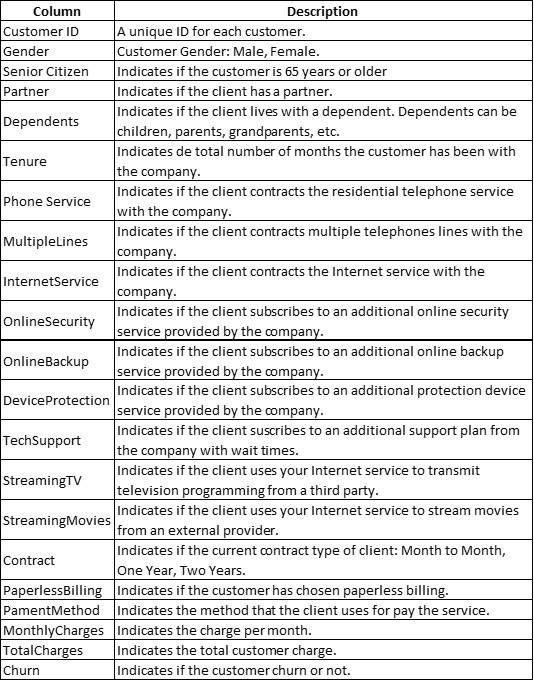

In [1]:
from IPython.display import Image
Image(filename =r'Data_Dictionary.jpg')

### 2.2 Exploratory Data Analysis (EDA)

In [2]:
# Importing libraries for the analysis

import pandas as pd
import math
import numpy as np
import scipy.stats as stats
from scipy.stats import binom
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import f_oneway
from scipy.stats import norm
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, KFold, cross_val_score, GridSearchCV
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier, ExtraTreesClassifier

import warnings
warnings.filterwarnings('ignore')

In [3]:
# Loading dataset.
df_churn = pd.read_csv('Telco_Churn.csv')

In [4]:
df_churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Looking at the first 5 rows and columns of the dataset, we can see a mixture of categorical, and numerical variables to be analyzed.

In [5]:
df_churn.shape
print('The dataset original shape is: ', df_churn.shape) 

The dataset original shape is:  (7043, 21)


In [6]:
#Statistics of numerical variables
df_churn.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


After analysing the descriptive statistics of the numerical values, we appreciate the number of values we have in each row, mean, standard deviation, minimum and maximum values,and the quartiles divided in 25%, 50%, and 75%.


- In each column we have 7043 rows.

- The mean of Senior Citizen is 0.16 which column is binary telling us that tends to 0 (which means No) giving us information that the majority of the people are not Senior Citizens, Tenure's mean is 32.37, but we have to note that tenure is measured monthly, and the mean of monthly charges is around 64.76.

- We can appreciate the different standard deviation values which is a measure of dispertion for explaining variability in the dataset.

- Besides, we have the min, max and quatile values (25th, 50th and 75th percentiles of the data), denoting that the 50th percentile is the median of the data set.

In [7]:
#Statistics of categorical variables
df_churn.describe(include=object)

,customerID,gender,Partner,Dependents,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,TotalCharges,Churn
count,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043,7043
unique,7043,2,2,2,2,3,3,3,3,3,3,3,3,3,2,4,6531,2
top,7590-VHVEG,Male,No,No,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,,No
freq,1,3555,3641,4933,6361,3390,3096,3498,3088,3095,3473,2810,2785,3875,4171,2365,11,5174


In the description of the categorical variables, we can appreciate the number of rows in each variable (count), how many unique values we have in each variable, the top or mode of each and the frequency in each one.

In [8]:
#Information of the variables
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


We can see that some variables are shown as object. However, according to the data dictionary, they should represent a numeric value for example "TotalCharges" and "OnlineBackup", this will be analized in the Data Cleaning part.

Now, let's take look at the target variable.

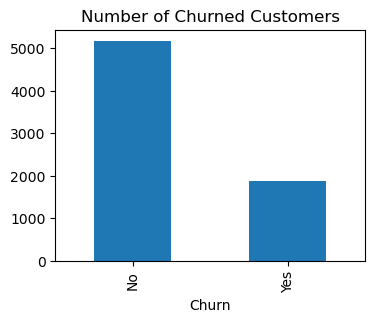

In [9]:
#Bar Plot target variable
target = df_churn.groupby('Churn').size()
target.plot(kind='bar',figsize=(4,3),
                 title= 'Number of Churned Customers');

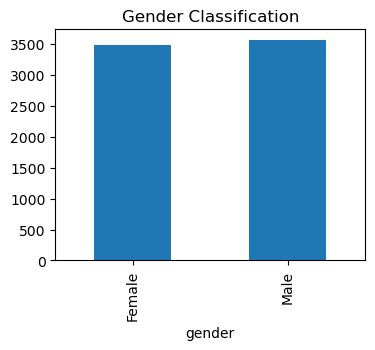

In [10]:
#Bar Plot target variable
target = df_churn.groupby('gender').size()
target.plot(kind='bar',figsize=(4,3),
                 title= 'Gender Classification');

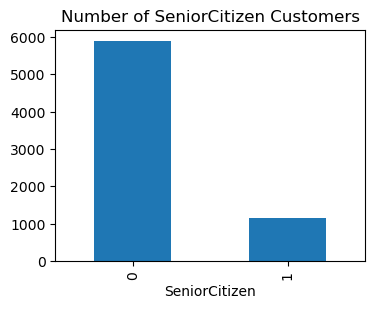

In [11]:
#Bar Plot target variable
target = df_churn.groupby('SeniorCitizen').size()
target.plot(kind='bar',figsize=(4,3),
                 title= 'Number of SeniorCitizen Customers');

We can see that most of the customers are not Senior Citizen, it means that more of them are nos older adults.

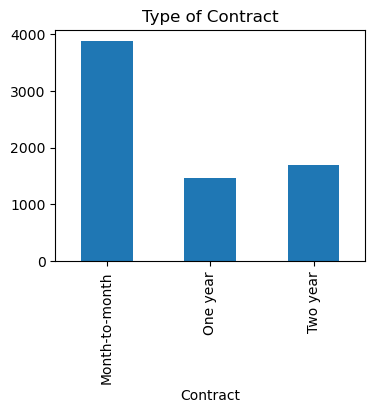

In [12]:
#Bar Plot target variable
target = df_churn.groupby('Contract').size()
target.plot(kind='bar',figsize=(4,3),
                 title= 'Type of Contract');

We can see that th company have more clients with contracts Month to Month.

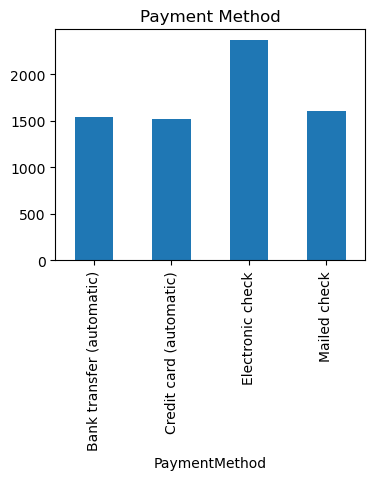

In [13]:
#Bar Plot target variable
target = df_churn.groupby('PaymentMethod').size()
target.plot(kind='bar',figsize=(4,3),
                 title= 'Payment Method');

We can see that most of the customers do their payments by Electronic Check

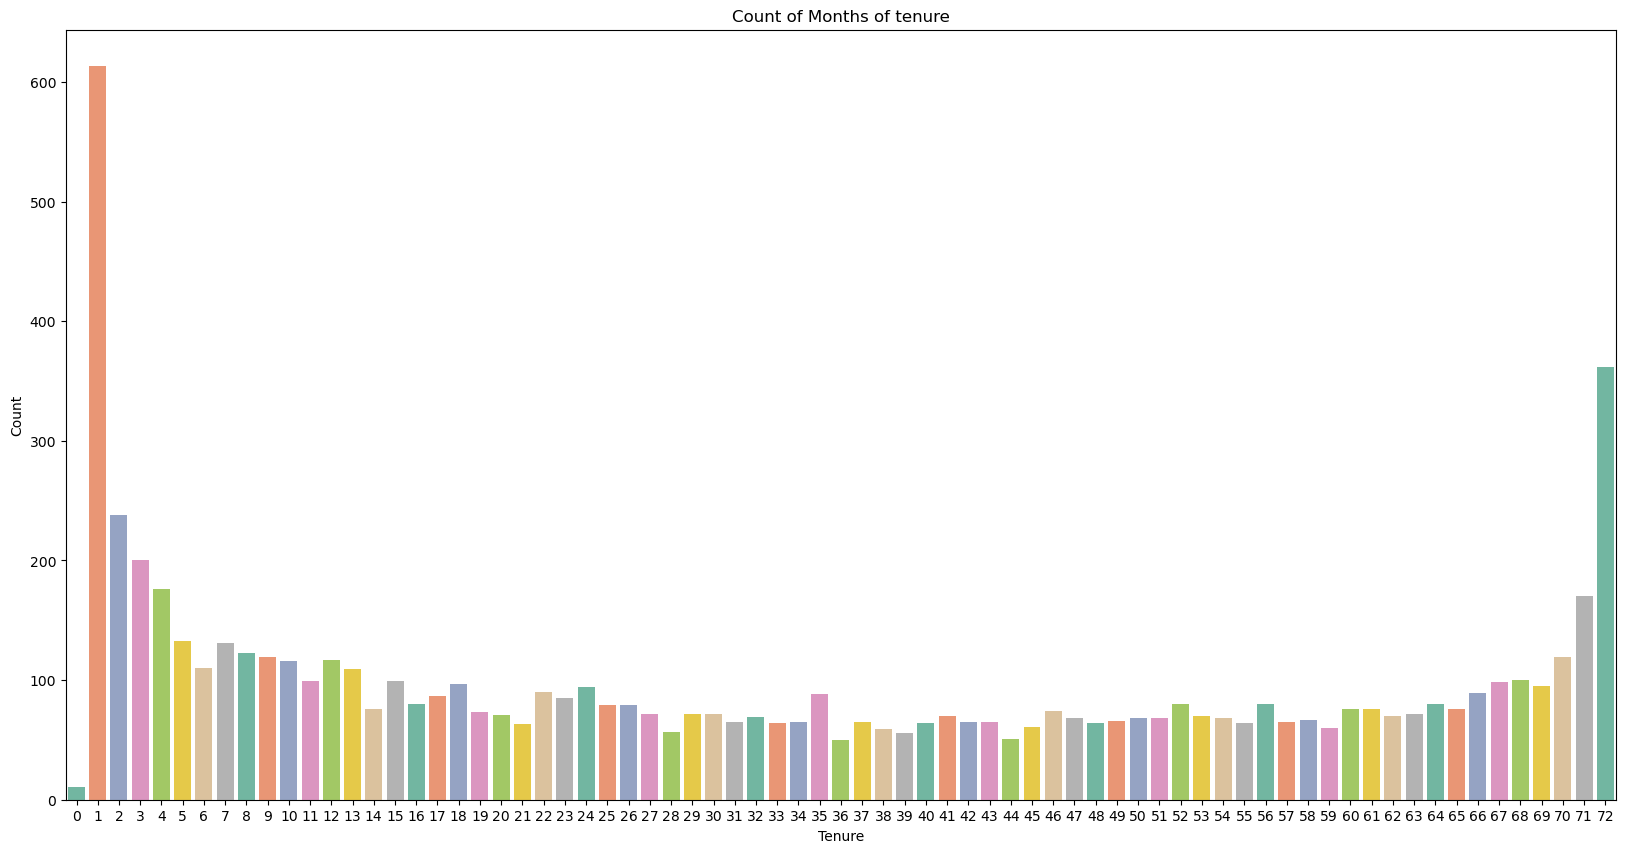

In [14]:
plt.figure(figsize=(20, 10))
sns.countplot(x='tenure', data=df_churn, palette='Set2')

plt.title('Count of Months of tenure')
plt.xlabel('Tenure')
plt.ylabel('Count')

plt.show()

lA COMPA;IA DEBE TRABAJAR MAS PARA RETENER CLIENTES

In [15]:
float_columns = df_churn.select_dtypes(include=['float64']).columns
float_columns

Index(['MonthlyCharges'], dtype='object')

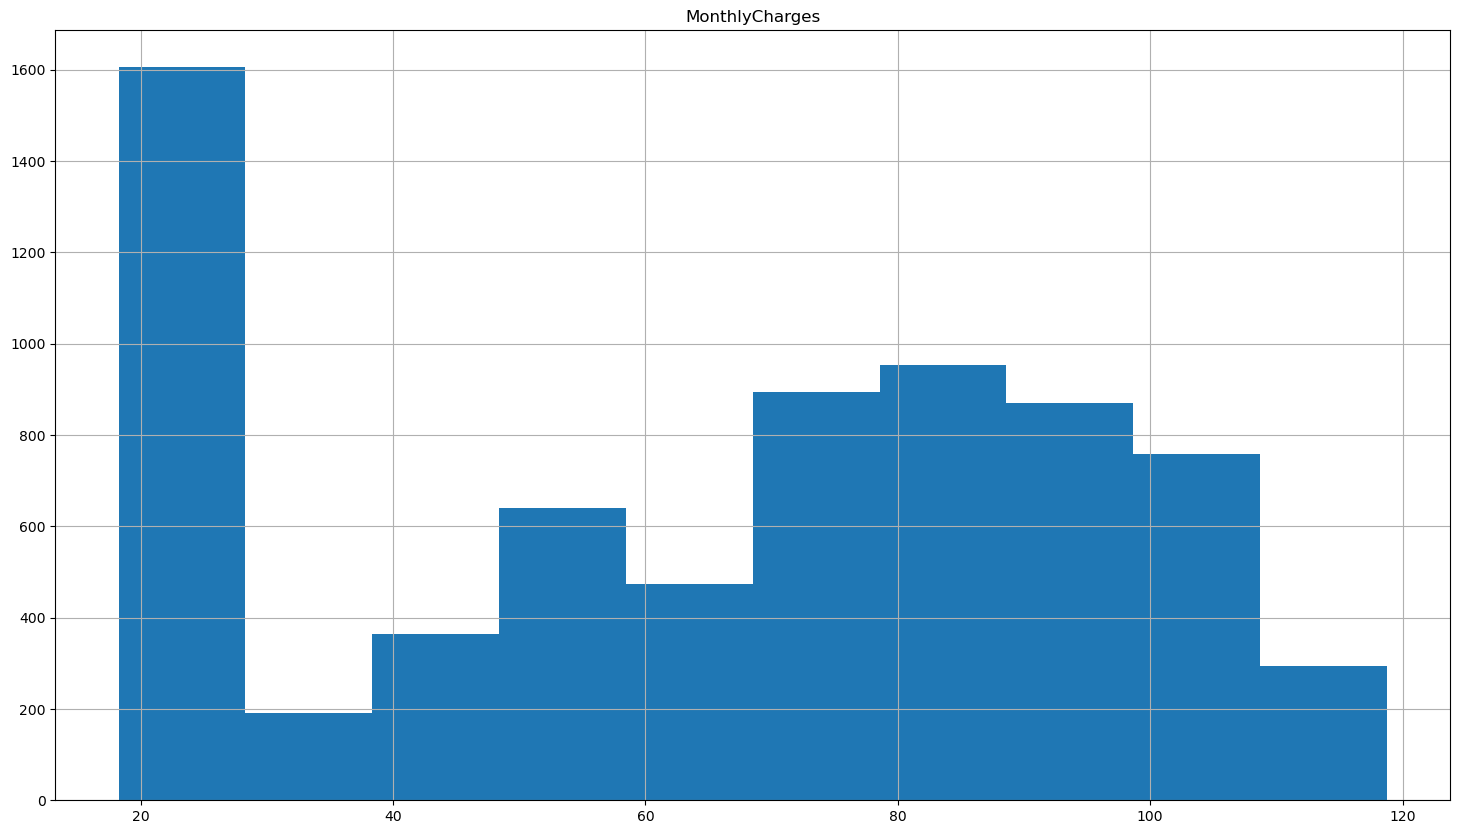

In [16]:
df_churn.hist(['MonthlyCharges'], figsize=(18,10), grid= True);

## Data Cleaning and Feature Engineering

We are going to standarize the "Nan" values and analyze their presence in each column.

In [17]:
# Standarizing "NaN" values
missing_val = ["n.a.", "?", "NA", "n/a", "na", "--", " ", "-",""]
df_churn = df_churn.replace(missing_val, pd.NA)

In [18]:
#Number of null values in each column
num_nulls_b = df_churn.isna().sum()
print(num_nulls_b)

customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64


We have Null Values in the column Total Charges, when we are analyzing the data visualization, we will decide what is the best approach to deal with the missing values, but first let'e analyze the column "OnlineBackup" as previous semester "OnlineBackup" that has a value different than "Yes" or "No" was replaced by zeros.

In [19]:
df_churn['OnlineBackup']

0       Yes
1        No
2       Yes
3        No
4        No
       ... 
7038     No
7039    Yes
7040     No
7041     No
7042     No
Name: OnlineBackup, Length: 7043, dtype: object

In [20]:
# We replace the categorical data in the "OnlineBackup", "No" and "Yes" columns with 0 and 1
df_churn['OnlineBackup'].replace('No', 0, inplace = True)
df_churn['OnlineBackup'].replace('Yes', 1, inplace = True)
df_churn['OnlineBackup'].value_counts(dropna=False)

0                      3088
1                      2429
No internet service    1526
Name: OnlineBackup, dtype: int64

After looking cartefully inside the column "OnlineBackup" replacing "No internet Service" by zeros is not a good option since having internet without Online back up is not the same that not having internet. Probably this customers pay a little bit less for the service without online bakcup. So in this case, they will be replaces by 2.

In [21]:
#Replacing "No internet service" with teh number 2
df_churn['OnlineBackup'].replace('No internet service', 2, inplace = True)

For solving the issues with "TotalCharges" column, we will replace the "Nan" values with the multiplication between "tenure" and "MonthlyCharges" columns

In [22]:
#Replacing Nan values and showing the percentage of them.
df_churn['TotalCharges'] = df_churn['TotalCharges'].fillna(df_churn['tenure'] * df_churn['MonthlyCharges'])
df_churn['TotalCharges'] = df_churn['TotalCharges'].astype(float)
num_nulls_b = df_churn.isna().sum()
print(num_nulls_b)

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64


In [23]:
df_churn.drop(['customerID'], axis=1, inplace = True)

"customerID" variable was dropped from our dataset since it is like an index with combination of numbers and letters which make us consider not necessary for our analysis

In [24]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


For a better understanding of the data, we will replace all the categorical values into numeric representations of them, and instead of using label encoder and autodefined encodders, we will repalace one by one for a knowing with certainty which numerical value represent that category.

In [25]:
# We replaced the categorical data found within the "gender" column, which are "Male" and "Female" with 0 and 1.
df_churn['gender'].replace('Male', 0, inplace = True)
df_churn['gender'].replace('Female', 1, inplace = True)

# We replaced the categorical data found within the "Partner" column, which are "No" and "Yes" with 0 and 1.
df_churn['Partner'].replace('No', 0, inplace = True)
df_churn['Partner'].replace('Yes', 1, inplace = True)

# We replaced the categorical data found within the "Dependents" column, which are "No" and "Yes" with 0 and 1.
df_churn['Dependents'].replace('No', 0, inplace = True)
df_churn['Dependents'].replace('Yes', 1, inplace = True)

# We replaced the categorical data in the "PhoneService", "No" and "Yes" columns with 0 and 1
df_churn['PhoneService'].replace('No', 0, inplace = True)
df_churn['PhoneService'].replace('Yes', 1, inplace = True)

# We replace the categorical data in the "MultipleLines", "No", "Yes" and "No phone service" columns with 0, 1 and 2
df_churn['MultipleLines'].replace('No', 0, inplace = True)
df_churn['MultipleLines'].replace('Yes', 1, inplace = True)
df_churn['MultipleLines'].replace('No phone service', 2, inplace = True)

# We replaced the categorical data in the "InternetService", "No", "DSL" and "Fiber optic" columns with 0, 1 and 2
df_churn['InternetService'].replace('No', 0, inplace = True)
df_churn['InternetService'].replace('DSL', 1, inplace = True)
df_churn['InternetService'].replace('Fiber optic', 2, inplace = True)

# We replaced the categorical data in the "OnlineSecurity", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['OnlineSecurity'].replace('No', 0, inplace = True)
df_churn['OnlineSecurity'].replace('No internet service', 1, inplace = True)
df_churn['OnlineSecurity'].replace('Yes', 2, inplace = True)

# We replaced the categorical data in the "DeviceProtection", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['DeviceProtection'].replace('No', 0, inplace = True)
df_churn['DeviceProtection'].replace('No internet service', 1, inplace = True)
df_churn['DeviceProtection'].replace('Yes', 2, inplace = True)

# We replaced the categorical data in the "TechSupport", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['TechSupport'].replace('No', 0, inplace = True)
df_churn['TechSupport'].replace('No internet service', 1, inplace = True)
df_churn['TechSupport'].replace('Yes', 2, inplace = True)

# We replaced the categorical data in the "StreamingTV", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['StreamingTV'].replace('No', 0, inplace = True)
df_churn['StreamingTV'].replace('No internet service', 1, inplace = True)
df_churn['StreamingTV'].replace('Yes', 2, inplace = True)

# We replaced the categorical data in the "StreamingTV", "No", "No internet service" and "Yes",  columns with 0, 1 and 2
df_churn['StreamingMovies'].replace('No', 0, inplace = True)
df_churn['StreamingMovies'].replace('No internet service', 1, inplace = True)
df_churn['StreamingMovies'].replace('Yes', 2, inplace = True)

# We replaced the categorical data found within the "Contract" column, which are "Month-to-month","Two year" and "One year" with 0, 1 and 2.
df_churn['Contract'].replace('Month-to-month', 0, inplace = True)
df_churn['Contract'].replace('Two year', 1, inplace = True)
df_churn['Contract'].replace('One year', 2, inplace = True)

# We replaced the categorical data in the "PaperlessBilling", "No" and "Yes" columns with 0 and 1
df_churn['PaperlessBilling'].replace('No', 0, inplace = True)
df_churn['PaperlessBilling'].replace('Yes', 1, inplace = True)

# We replace the categorical data in the "PaymentMethod", "No" and "Yes" columns with 0 and 1
df_churn['PaymentMethod'].replace('Electronic check', 0, inplace = True)
df_churn['PaymentMethod'].replace('Mailed check', 1, inplace = True)
df_churn['PaymentMethod'].replace('Bank transfer (automatic)', 2, inplace = True)
df_churn['PaymentMethod'].replace('Credit card (automatic)', 3, inplace = True)

# We replaced the categorical data found within the "Churn" column, which are "No" and "Yes" with 0 and 1.
df_churn['Churn'].replace('No', 0, inplace = True)
df_churn['Churn'].replace('Yes', 1, inplace = True)

In [26]:
df_churn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   int64  
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   int64  
 3   Dependents        7043 non-null   int64  
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   int64  
 6   MultipleLines     7043 non-null   int64  
 7   InternetService   7043 non-null   int64  
 8   OnlineSecurity    7043 non-null   int64  
 9   OnlineBackup      7043 non-null   int64  
 10  DeviceProtection  7043 non-null   int64  
 11  TechSupport       7043 non-null   int64  
 12  StreamingTV       7043 non-null   int64  
 13  StreamingMovies   7043 non-null   int64  
 14  Contract          7043 non-null   int64  
 15  PaperlessBilling  7043 non-null   int64  
 16  PaymentMethod     7043 non-null   int64  


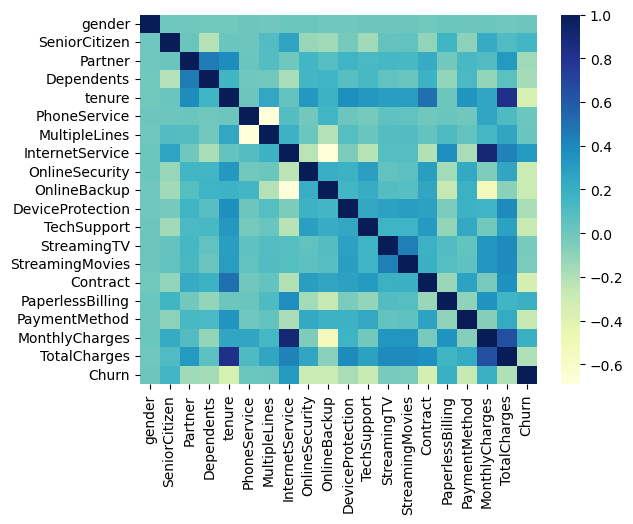

In [27]:
corr_matrix = df_churn.corr()

sns.heatmap(corr_matrix, cmap="YlGnBu")
plt.show()

In [28]:
# Correlation of the variables with the column churn
correlation_churn = df_churn.corr()['Churn']
print(correlation_churn)

gender              0.008612
SeniorCitizen       0.150889
Partner            -0.150448
Dependents         -0.164221
tenure             -0.352229
PhoneService        0.011942
MultipleLines       0.019423
InternetService     0.316846
OnlineSecurity     -0.289309
OnlineBackup       -0.291449
DeviceProtection   -0.178134
TechSupport        -0.282492
StreamingTV        -0.036581
StreamingMovies    -0.038492
Contract           -0.341504
PaperlessBilling    0.191825
PaymentMethod      -0.262818
MonthlyCharges      0.193356
TotalCharges       -0.198324
Churn               1.000000
Name: Churn, dtype: float64


According to the matrix of correlation and the results we have gotten with the target variable "Churn", we can see that our target variable is very correlated with the column "tenure", "InternetService", "OnlineBackup", among others, but we will apply different tests to see if all the variables are really necesary for our analysis.

In [29]:
df_churn.nunique()

gender                 2
SeniorCitizen          2
Partner                2
Dependents             2
tenure                73
PhoneService           2
MultipleLines          3
InternetService        3
OnlineSecurity         3
OnlineBackup           3
DeviceProtection       3
TechSupport            3
StreamingTV            3
StreamingMovies        3
Contract               3
PaperlessBilling       2
PaymentMethod          4
MonthlyCharges      1585
TotalCharges        6531
Churn                  2
dtype: int64

For the columns in which we have less than 30 unique values, we are going to apply Anova Test and for the ones that have more or same as 30 unique values, we are going to apply Chi-suqared test.

In [30]:
# Defining a function to find the statistical relationship with all the categorical variables
def FunctionAnova(inpData, TargetVariable, ContinuousPredictorList):
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]
    
    print('##### ANOVA Results ##### \n')
    for predictor in ContinuousPredictorList:
        CategoryGroupLists=inpData.groupby(TargetVariable)[predictor].apply(list)
        AnovaResults = f_oneway(*CategoryGroupLists)
        
        # If the ANOVA P-Value is <0.05, that means we reject H0
        if (AnovaResults[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', AnovaResults[1])
    return(SelectedPredictors)

In [31]:
# Calling the function to check which categorical variables are correlated with target
continuousVariables = ['tenure', 'MonthlyCharges', 'TotalCharges']
FunctionAnova(df_churn, 'Churn', continuousVariables )

##### ANOVA Results ##### 

tenure is correlated with Churn | P-Value: 7.999057960610892e-205
MonthlyCharges is correlated with Churn | P-Value: 2.7066456068950115e-60
TotalCharges is correlated with Churn | P-Value: 2.127211613245422e-63


['tenure', 'MonthlyCharges', 'TotalCharges']

In [32]:
# Writing a function to find the correlation of all categorical variables with the Target variable
def FunctionChisq(inpData, TargetVariable, CategoricalVariablesList):
    from scipy.stats import chi2_contingency
    
    # Creating an empty list of final selected predictors
    SelectedPredictors=[]

    for predictor in CategoricalVariablesList:
        CrossTabResult=pd.crosstab(index=inpData[TargetVariable], columns=inpData[predictor])
        ChiSqResult = chi2_contingency(CrossTabResult)
        
        # If the ChiSq P-Value is <0.05, that means we reject H0
        if (ChiSqResult[1] < 0.05):
            print(predictor, 'is correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])
            SelectedPredictors.append(predictor)
        else:
            print(predictor, 'is NOT correlated with', TargetVariable, '| P-Value:', ChiSqResult[1])        
            
    return(SelectedPredictors)

In [33]:
categoricalVariables = ['gender', 'SeniorCitizen', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling', 'PaymentMethod']

# Calling the function
FunctionChisq(df_churn, 'Churn', categoricalVariables)

gender is NOT correlated with Churn | P-Value: 0.48657873605618596
SeniorCitizen is correlated with Churn | P-Value: 1.510066805092378e-36
Partner is correlated with Churn | P-Value: 2.1399113440759935e-36
Dependents is correlated with Churn | P-Value: 4.9249216612154196e-43
PhoneService is NOT correlated with Churn | P-Value: 0.3387825358066928
MultipleLines is correlated with Churn | P-Value: 0.0034643829548773
InternetService is correlated with Churn | P-Value: 9.571788222840544e-160
OnlineSecurity is correlated with Churn | P-Value: 2.6611496351768565e-185
OnlineBackup is correlated with Churn | P-Value: 2.0797592160865457e-131
DeviceProtection is correlated with Churn | P-Value: 5.505219496457244e-122
TechSupport is correlated with Churn | P-Value: 1.4430840279999813e-180
StreamingTV is correlated with Churn | P-Value: 5.528994485739024e-82
StreamingMovies is correlated with Churn | P-Value: 2.667756755723681e-82
Contract is correlated with Churn | P-Value: 5.863038300672725e-258


['SeniorCitizen',
 'Partner',
 'Dependents',
 'MultipleLines',
 'InternetService',
 'OnlineSecurity',
 'OnlineBackup',
 'DeviceProtection',
 'TechSupport',
 'StreamingTV',
 'StreamingMovies',
 'Contract',
 'PaperlessBilling',
 'PaymentMethod']

After applying both tests we can see that the columns "gender", and "PhoneService" are not correlated and that is why we are going to drop them

In [34]:
df_churn = df_churn.drop(['gender', 'PhoneService'], axis= 1)

Before performing the modelling part, we are going to separate using the function dummies inside the columns "InternetService", "PaymentMethod" and "Contract"

In [35]:
# Create dummy variables for the "InternetService" column
internet_service_dummies = pd.get_dummies(df_churn["InternetService"], prefix="InternetService")
# Select the resulting columns
with_out_internet_service = internet_service_dummies["InternetService_0"]
internet_service_dsl = internet_service_dummies["InternetService_1"]
internet_service_fiber_optic = internet_service_dummies["InternetService_2"]
# Concatenates the resulting columns into a our data frame
df_churn = pd.concat([df_churn, with_out_internet_service, internet_service_dsl, internet_service_fiber_optic], axis=1)
# Delete the original column "InternetService"
df_churn = df_churn.drop(columns=["InternetService"])
# Rename columns
df_churn = df_churn.rename(columns={
    "InternetService_0": "Without Internet Service",
    "InternetService_1": "Internet Service DSL",
    "InternetService_2": "Internet Service Fiber Optic"
})
df_churn.head()

,SeniorCitizen,Partner,Dependents,tenure,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn,Without Internet Service,Internet Service DSL,Internet Service Fiber Optic
0,0,1,0,1,2,0,1,0,0,0,0,0,1,0,29.85,29.85,0,0,1,0
1,0,0,0,34,0,2,0,2,0,0,0,2,0,1,56.95,1889.50,0,0,1,0
2,0,0,0,2,0,2,1,0,0,0,0,0,1,1,53.85,108.15,1,0,1,0
3,0,0,0,45,2,2,0,2,2,0,0,2,0,2,42.30,1840.75,0,0,1,0
4,0,0,0,2,0,0,0,0,0,0,0,0,1,0,70.70,151.65,1,0,0,1


## Applying One Hot Encoder


## PCA

In [40]:
df_churn_without_column_churn =  df_churn.drop(["Churn"], axis = 1)

In [41]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

df_churn_without_column_churn = scaler.fit_transform(df_churn_without_column_churn)

In [42]:
from sklearn.decomposition import PCA

pca = PCA(0.995).fit(df_churn_without_column_churn)
num_components = pca.n_components_

print('Number of Components:', num_components)

Number of Components: 16


In [43]:
pca = PCA(16)

projected = pca.fit_transform(df_churn_without_column_churn)

projected.shape

(7043, 16)

In [44]:
df_projected = pd.DataFrame(projected)

new_col_names = [f"A{i+1}" for i in range(16)]
df_projected.columns = new_col_names
df_projected["Churn"] = df_churn['Churn']

## Modeling

In [45]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from matplotlib import pyplot

## Applying the models with 10% test and 90% training

In [46]:
from sklearn.model_selection import train_test_split

X = df_projected.drop('Churn', axis=1)
y = df_projected['Churn']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.1, random_state=42)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(6338, 16) (705, 16) (6338,) (705,)


In [47]:
y_train.value_counts()

0    4663
1    1675
Name: Churn, dtype: int64

In [48]:
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [49]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), np.nanstd(cv_results))
    print(msg)

LR: 0.801991 (0.015942)
LDA: 0.798044 (0.013851)
KNN: nan (nan)
CART: 0.729092 (0.010550)
NB: 0.785106 (0.012192)
NN: 0.786053 (0.018997)
RF: 0.782107 (0.009508)


The best model is Logistic Regression. Let's explore the classification report

Accuracy Score:  0.8212765957446808

Classification Report: 
               precision    recall  f1-score   support

           0       0.85      0.91      0.88       511
           1       0.71      0.59      0.65       194

    accuracy                           0.82       705
   macro avg       0.78      0.75      0.76       705
weighted avg       0.81      0.82      0.82       705


Confusion Matrix: 
 [[464  47]
 [ 79 115]]


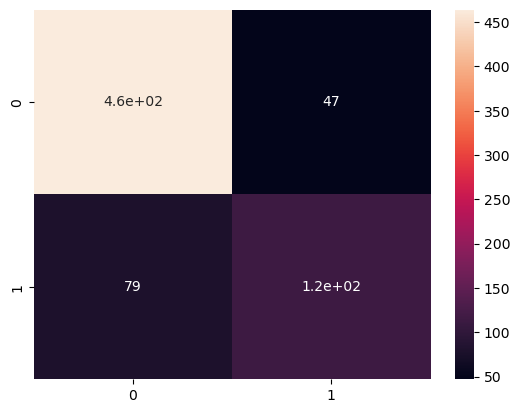

In [50]:
model = LogisticRegression(solver='liblinear', multi_class='ovr')
model.fit(X_train, y_train)
y_pred = model.predict(X_validation)

print("Accuracy Score: ", accuracy_score(y_validation, y_pred))

print("\nClassification Report: "'\n', classification_report(y_validation, y_pred))

cm = confusion_matrix(y_validation, y_pred)
sns.heatmap(cm, annot = True)

print("\nConfusion Matrix: "'\n', confusion_matrix(y_validation, y_pred))

Although we have a good accuracy specially using Logistic Regression, the model does't perform very good when we look at the precision and recall of 1 that is trying to predict the people that churned at the company. According to the correlation matrix the model has 81 false negatives churned values that were not well predicted.

## Model Tuning

In this part instead of using accuracy as our score, we are going to use recall since we want to improve the models for predicting the people that are goning to churn in our company.

In [51]:
scoring = 'recall'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [52]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), 
                           np.nanstd(cv_results))
    print(msg)

LR: 0.528648 (0.039392)
LDA: 0.548356 (0.036609)
KNN: nan (nan)
CART: 0.480485 (0.029280)
NB: 0.578179 (0.047872)
NN: 0.506525 (0.047820)
RF: 0.452327 (0.019597)


Now Gaussian NB is the best model that performs with our data according to the recall

In [53]:
# Analyzing NB model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [54]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7957446808510639
[[441  70]
 [ 74 120]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86       511
           1       0.63      0.62      0.62       194

    accuracy                           0.80       705
   macro avg       0.74      0.74      0.74       705
weighted avg       0.79      0.80      0.80       705



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

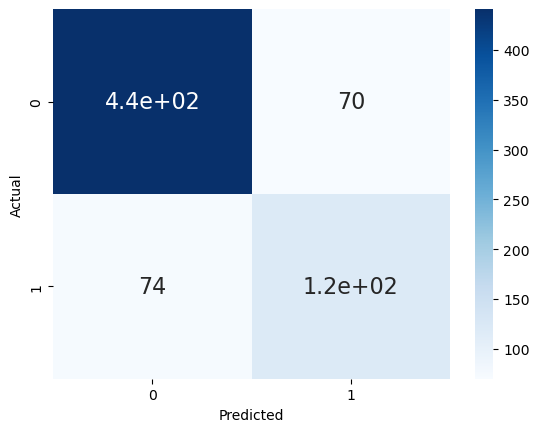

In [55]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

we can see now 30 cases of false negatives, but we are going to work in balancing the dataset for better results

## Model Tuning for balancing the sample using Random Under Sampling with 10% test and 90% training

In [56]:
y_train.head()

1554    0
4817    0
5957    1
5123    1
3217    0
Name: Churn, dtype: int64

In [57]:
df = pd.concat([X_train, y_train], axis=1)
churned_df = df.loc[df['Churn'] == 1]
non_churned_df = df.loc[df['Churn'] == 0][:churned_df.shape[0]]

normal_distributed_df = pd.concat([churned_df, non_churned_df])

# Shuffle dataframe rows
df_new_churn = normal_distributed_df.sample(frac=1, random_state=42)
# split out validation dataset for the end
y_train_new= df_new_churn["Churn"]
X_train_new = df_new_churn.loc[:, df_projected.columns != 'Churn']

In [58]:
df_new_churn.Churn.unique()

array([0, 1], dtype=int64)

Distribution of the Classes in the subsample churn dataset
0    0.5
1    0.5
Name: Churn, dtype: float64


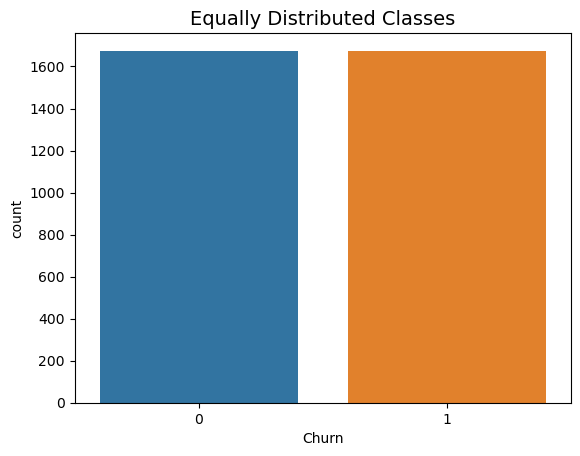

In [59]:
print('Distribution of the Classes in the subsample churn dataset')
print(df_new_churn['Churn'].value_counts() / len(df_new_churn))
sns.countplot(x='Churn', data=df_new_churn)
pyplot.title('Equally Distributed Classes', fontsize=14)
pyplot.show()

We have balanced our data and now we can improve our metrics using accuracy as scoring

In [60]:
scoring='accuracy'
# Applying Machine Learning Algorithms for classification
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
#models.append(('SVM', SVC()))
#Neural Network
models.append(('NN', MLPClassifier()))
# #Ensable Models 
# Boosting methods
#models.append(('AB', AdaBoostClassifier()))
#models.append(('GBM', GradientBoostingClassifier()))
# Bagging methods
models.append(('RF', RandomForestClassifier()))
#models.append(('ET', ExtraTreesClassifier()))

In [61]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_new, y_train_new,
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), 
                           np.nanstd(cv_results))
    print(msg)

LR: 0.755831 (0.019857)
LDA: 0.756724 (0.021268)
KNN: nan (nan)
CART: 0.666578 (0.014093)
NB: 0.745080 (0.015870)
NN: 0.737919 (0.016840)
RF: 0.724490 (0.021883)


## Applying Hyperparameter tuning with Logistic Regression

In [62]:
test_split_percentages = [0.10]

for test_size in test_split_percentages:
    # Split the data into training and validation sets
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    
    # Define the hyperparameter grid
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Range of C values to test
        'solver': ['liblinear'],  # You can include multiple solvers if needed
        'penalty': ['l1', 'l2'],  # Test both L1 and L2 regularization
        'max_iter': [100, 200, 300]  # Range of max_iter values to test
    }

    # Create a logistic regression model
    logistic_regression = LogisticRegression()

    # Use GridSearchCV to perform hyperparameter tuning
    grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, n_jobs=-1)

    # Fit the grid search to your training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the Model
    y_predict = best_model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(best_model)
    
    print(f"Best Hyperparameters: {best_params}")
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")

Best Model for 10% Test Split:
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for 10% Test Split: 0.755223880597015




In [63]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = best_model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.755223880597015
[[121  38]
 [ 44 132]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       159
           1       0.78      0.75      0.76       176

    accuracy                           0.76       335
   macro avg       0.75      0.76      0.75       335
weighted avg       0.76      0.76      0.76       335



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

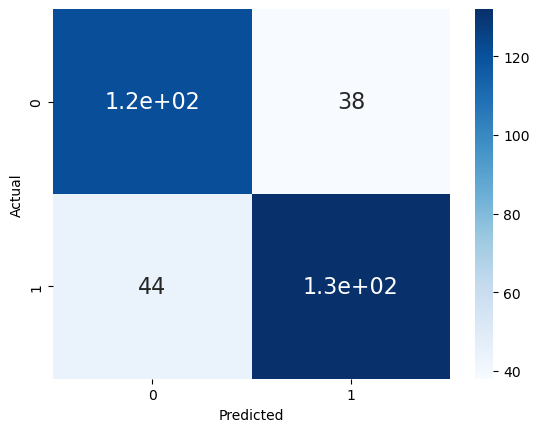

In [64]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Applying Hyperparameter tuning with Linear Discriminant Analysis (LDA)

In [65]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# List of test split ratios
test_split_percentages = [0.10]

for test_size in test_split_percentages:
    # Split the data into training and validation sets
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    
    # Create a Linear Discriminant Analysis model
    lda = LinearDiscriminantAnalysis()
    
    # Set up parameter grid for LDA
    parameter_grid = {
        'solver': ['svd', 'lsqr', 'eigen'],  # Different solver options
        'shrinkage': [None, 'auto']          # Whether or not to apply shrinkage
    }
    
    # Set up Grid Search
    grid = GridSearchCV(lda, parameter_grid, cv=5, scoring='accuracy')
    
    # Fit the grid search
    grid.fit(X_train, y_train)
    
    # Get the best model
    model = grid.best_estimator_
    
    # Evaluate the Model
    y_predict = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(model)
    
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")


Best Model for 10% Test Split:
LinearDiscriminantAnalysis()
Accuracy for 10% Test Split: 0.7611940298507462




In [66]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = best_model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.755223880597015
[[121  38]
 [ 44 132]]
              precision    recall  f1-score   support

           0       0.73      0.76      0.75       159
           1       0.78      0.75      0.76       176

    accuracy                           0.76       335
   macro avg       0.75      0.76      0.75       335
weighted avg       0.76      0.76      0.76       335



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

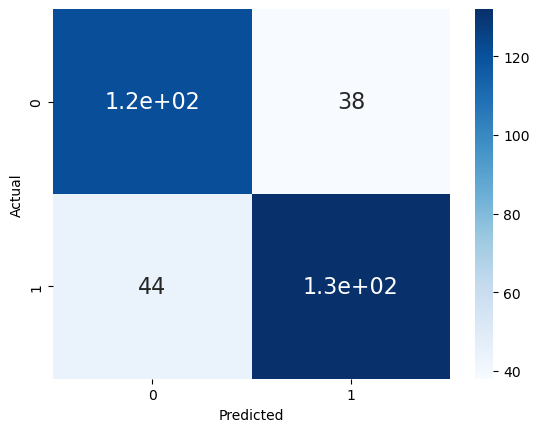

In [67]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Applying Hyperparameter tuning with KNeighbors Classifier (KNN)

In [68]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# List of test split ratios
test_split_percentages = [0.10]

for test_size in test_split_percentages:
    # Split the data into training and validation sets
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    
    # Create a KNeighborsClassifier model
    knn = KNeighborsClassifier()
    
    # Set up parameter grid for KNeighborsClassifier
    parameter_grid = {
        'n_neighbors': [3, 5, 7],  # Number of neighbors
        'weights': ['uniform', 'distance'],  # Weighting of neighbors
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm for nearest neighbors
    }
    
    # Set up Grid Search
    grid = GridSearchCV(knn, parameter_grid, cv=5, scoring='accuracy')
    
    # Fit the grid search
    grid.fit(X_train, y_train)
    
    # Get the best model
    model = grid.best_estimator_
    
    # Evaluate the Model
    y_predict = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(model)
    
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")


  File "C:\Users\MIJAIL BLANCO\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


Best Model for 10% Test Split:
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)
Accuracy for 10% Test Split: 0.755223880597015




In [69]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.755223880597015
[[117  42]
 [ 40 136]]
              precision    recall  f1-score   support

           0       0.75      0.74      0.74       159
           1       0.76      0.77      0.77       176

    accuracy                           0.76       335
   macro avg       0.75      0.75      0.75       335
weighted avg       0.76      0.76      0.76       335



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

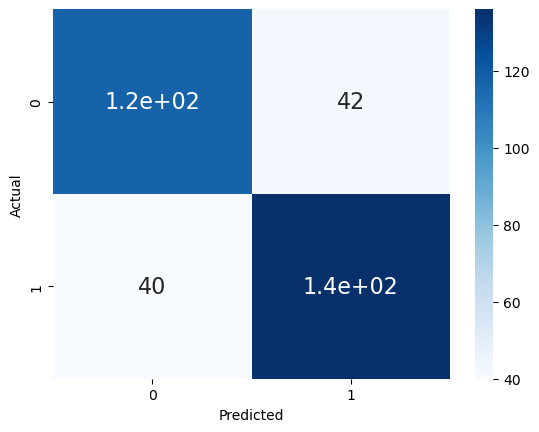

In [70]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Applying the models with 20% test and 80% training

In [71]:
from sklearn.model_selection import train_test_split

X = df_projected.drop('Churn', axis=1)
y = df_projected['Churn']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.2, random_state=42)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(5634, 16) (1409, 16) (5634,) (1409,)


In [72]:
y_train.value_counts()

0    4138
1    1496
Name: Churn, dtype: int64

In [73]:
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [74]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), np.nanstd(cv_results))
    print(msg)

LR: 0.799434 (0.007165)
LDA: 0.795175 (0.011574)
KNN: nan (nan)
CART: 0.718681 (0.022123)
NB: 0.783282 (0.008212)
NN: 0.788607 (0.009095)
RF: 0.777426 (0.010147)


## Model Tuning with 20% test and 80% training

In [75]:
scoring = 'recall'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [76]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), 
                           np.nanstd(cv_results))
    print(msg)

LR: 0.526092 (0.027190)
LDA: 0.543605 (0.032364)
KNN: nan (nan)
CART: 0.471168 (0.026926)
NB: 0.577024 (0.025523)
NN: 0.485471 (0.014507)
RF: 0.448756 (0.018742)


In [77]:
# Analyzing NB model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [78]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7955997161107168
[[893 143]
 [145 228]]
              precision    recall  f1-score   support

           0       0.86      0.86      0.86      1036
           1       0.61      0.61      0.61       373

    accuracy                           0.80      1409
   macro avg       0.74      0.74      0.74      1409
weighted avg       0.80      0.80      0.80      1409



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

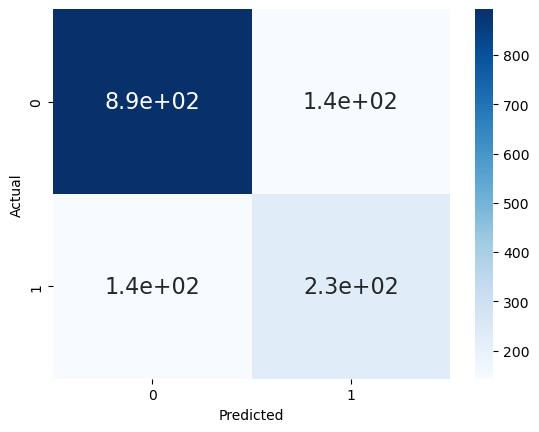

In [79]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Model Tuning for balancing the sample using Random Under Sampling with 20% test and 80% training

In [80]:
y_train.head()

2142    0
1623    0
6074    1
1362    1
6754    0
Name: Churn, dtype: int64

Distribution of the Classes in the subsample churn dataset
1    0.5
0    0.5
Name: Churn, dtype: float64


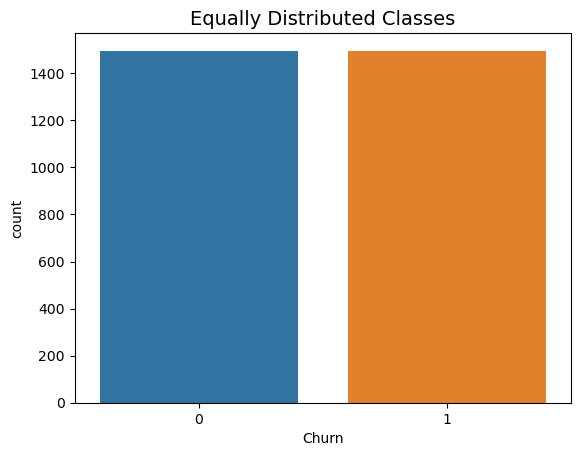

In [81]:
df = pd.concat([X_train, y_train], axis=1)
churned_df = df.loc[df['Churn'] == 1]
non_churned_df = df.loc[df['Churn'] == 0][:churned_df.shape[0]]

normal_distributed_df = pd.concat([churned_df, non_churned_df])

# Shuffle dataframe rows
df_new_churn = normal_distributed_df.sample(frac=1, random_state=42)
# split out validation dataset for the end
y_train_new= df_new_churn["Churn"]
X_train_new = df_new_churn.loc[:, df_projected.columns != 'Churn']
print('Distribution of the Classes in the subsample churn dataset')
print(df_new_churn['Churn'].value_counts() / len(df_new_churn))
sns.countplot(x='Churn', data=df_new_churn)
pyplot.title('Equally Distributed Classes', fontsize=14)
pyplot.show()

In [82]:
scoring='accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [83]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_new, y_train_new,
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), 
                           np.nanstd(cv_results))
    print(msg)

LR: 0.759691 (0.009199)
LDA: 0.759025 (0.009495)
KNN: nan (nan)
CART: 0.669801 (0.020390)
NB: 0.747671 (0.012115)
NN: 0.738657 (0.024267)
RF: 0.736983 (0.019629)


## Applying Hyperparameter tuning with Logistic Regression

In [84]:
test_split_percentages = [0.20]

for test_size in test_split_percentages:
    # Split the data into training and validation sets
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    
    # Define the hyperparameter grid
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Range of C values to test
        'solver': ['liblinear'],  # You can include multiple solvers if needed
        'penalty': ['l1', 'l2'],  # Test both L1 and L2 regularization
        'max_iter': [100, 200, 300]  # Range of max_iter values to test
    }

    # Create a logistic regression model
    logistic_regression = LogisticRegression()

    # Use GridSearchCV to perform hyperparameter tuning
    grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, n_jobs=-1)

    # Fit the grid search to your training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the Model
    y_predict = best_model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(best_model)
    
    print(f"Best Hyperparameters: {best_params}")
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")

Best Model for 20% Test Split:
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for 20% Test Split: 0.7545909849749582




In [85]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = best_model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7545909849749582
[[235  83]
 [ 64 217]]
              precision    recall  f1-score   support

           0       0.79      0.74      0.76       318
           1       0.72      0.77      0.75       281

    accuracy                           0.75       599
   macro avg       0.75      0.76      0.75       599
weighted avg       0.76      0.75      0.75       599



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

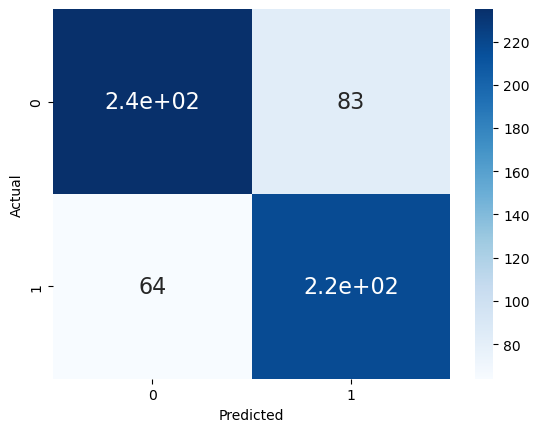

In [86]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Applying Hyperparameter tuning with Linear Discriminant Analysis (LDA)

In [87]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# List of test split ratios
test_split_percentages = [0.20]

for test_size in test_split_percentages:
    # Split the data into training and validation sets
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    
    # Create a Linear Discriminant Analysis model
    lda = LinearDiscriminantAnalysis()
    
    # Set up parameter grid for LDA
    parameter_grid = {
        'solver': ['svd', 'lsqr', 'eigen'],  # Different solver options
        'shrinkage': [None, 'auto']          # Whether or not to apply shrinkage
    }
    
    # Set up Grid Search
    grid = GridSearchCV(lda, parameter_grid, cv=5, scoring='accuracy')
    
    # Fit the grid search
    grid.fit(X_train, y_train)
    
    # Get the best model
    model = grid.best_estimator_
    
    # Evaluate the Model
    y_predict = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(model)
    
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")

Best Model for 20% Test Split:
LinearDiscriminantAnalysis(shrinkage='auto', solver='lsqr')
Accuracy for 20% Test Split: 0.7412353923205343




In [88]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7412353923205343
[[226  92]
 [ 63 218]]
              precision    recall  f1-score   support

           0       0.78      0.71      0.74       318
           1       0.70      0.78      0.74       281

    accuracy                           0.74       599
   macro avg       0.74      0.74      0.74       599
weighted avg       0.75      0.74      0.74       599



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

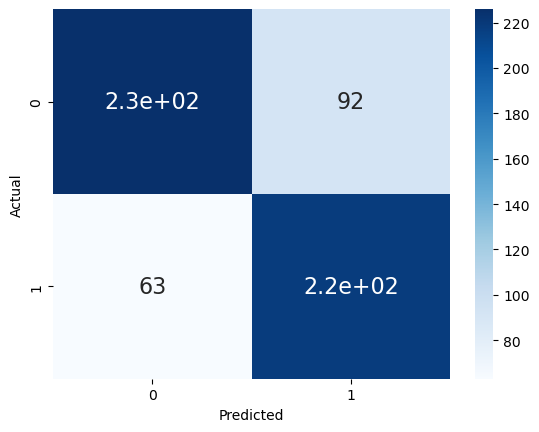

In [89]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Applying Hyperparameter tuning with KNeighbors Classifier (KNN)

In [90]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# List of test split ratios
test_split_percentages = [0.20]

for test_size in test_split_percentages:
    # Split the data into training and validation sets
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    
    # Create a KNeighborsClassifier model
    knn = KNeighborsClassifier()
    
    # Set up parameter grid for KNeighborsClassifier
    parameter_grid = {
        'n_neighbors': [3, 5, 7],  # Number of neighbors
        'weights': ['uniform', 'distance'],  # Weighting of neighbors
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm for nearest neighbors
    }
    
    # Set up Grid Search
    grid = GridSearchCV(knn, parameter_grid, cv=5, scoring='accuracy')
    
    # Fit the grid search
    grid.fit(X_train, y_train)
    
    # Get the best model
    model = grid.best_estimator_
    
    # Evaluate the Model
    y_predict = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(model)
    
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")

Best Model for 20% Test Split:
KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)
Accuracy for 20% Test Split: 0.7445742904841403




In [91]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7445742904841403
[[220  98]
 [ 55 226]]
              precision    recall  f1-score   support

           0       0.80      0.69      0.74       318
           1       0.70      0.80      0.75       281

    accuracy                           0.74       599
   macro avg       0.75      0.75      0.74       599
weighted avg       0.75      0.74      0.74       599



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

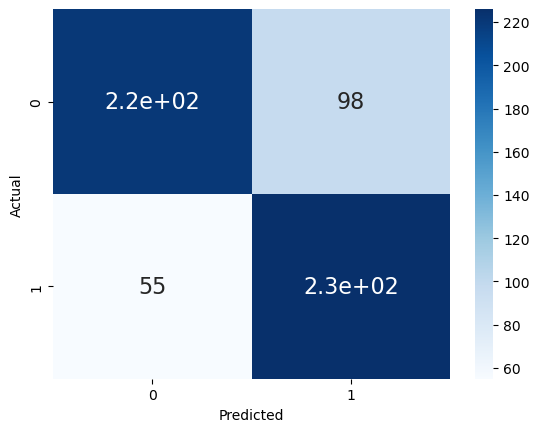

In [92]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Applying the models with 30% test and 70% training

In [93]:
from sklearn.model_selection import train_test_split

X = df_projected.drop('Churn', axis=1)
y = df_projected['Churn']

X_train, X_validation, y_train, y_validation = train_test_split(X, y, test_size=0.3, random_state=42)

print(X_train.shape, X_validation.shape, y_train.shape, y_validation.shape)

(4930, 16) (2113, 16) (4930,) (2113,)


In [94]:
y_train.value_counts()

0    3635
1    1295
Name: Churn, dtype: int64

In [95]:
scoring = 'accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [96]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), np.nanstd(cv_results))
    print(msg)

LR: 0.801624 (0.010652)
LDA: 0.796754 (0.011199)
KNN: nan (nan)
CART: 0.723932 (0.018321)
NB: 0.786004 (0.015784)
NN: 0.786412 (0.012602)
RF: 0.778905 (0.014344)


## Model Tuning with 30% test and 70% training

In [97]:
scoring = 'recall'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [98]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train, y_train, 
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), 
                           np.nanstd(cv_results))
    print(msg)

LR: 0.515858 (0.027778)
LDA: 0.533661 (0.027214)
KNN: nan (nan)
CART: 0.481058 (0.022607)
NB: 0.571953 (0.027108)
NN: 0.502117 (0.031311)
RF: 0.423292 (0.035783)


In [99]:
# Analyzing NB model
model = GaussianNB()
model.fit(X_train, y_train)

GaussianNB()

In [100]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7870326549929011
[[1325  214]
 [ 236  338]]
              precision    recall  f1-score   support

           0       0.85      0.86      0.85      1539
           1       0.61      0.59      0.60       574

    accuracy                           0.79      2113
   macro avg       0.73      0.72      0.73      2113
weighted avg       0.78      0.79      0.79      2113



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

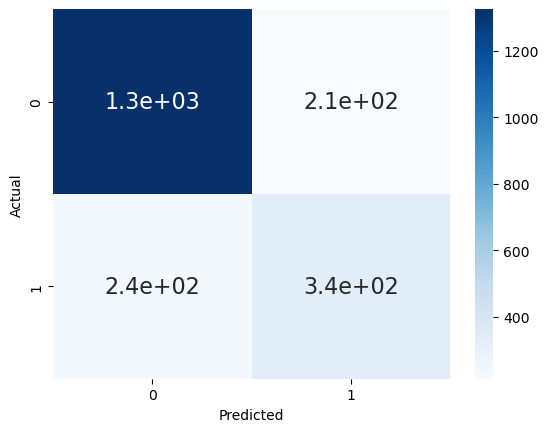

In [101]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Model Tuning for balancing the sample using Random Under Sampling with 30% test and 70% training.

In [102]:
y_train.head()

1695    0
1095    0
3889    0
3667    0
2902    0
Name: Churn, dtype: int64

Distribution of the Classes in the subsample churn dataset
1    0.5
0    0.5
Name: Churn, dtype: float64


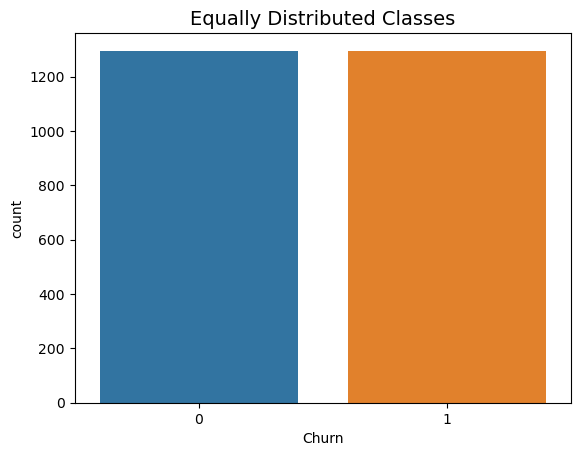

In [103]:
df = pd.concat([X_train, y_train], axis=1)
churned_df = df.loc[df['Churn'] == 1]
non_churned_df = df.loc[df['Churn'] == 0][:churned_df.shape[0]]

normal_distributed_df = pd.concat([churned_df, non_churned_df])

# Shuffle dataframe rows
df_new_churn = normal_distributed_df.sample(frac=1, random_state=42)
# split out validation dataset for the end
y_train_new= df_new_churn["Churn"]
X_train_new = df_new_churn.loc[:, df_projected.columns != 'Churn']
print('Distribution of the Classes in the subsample churn dataset')
print(df_new_churn['Churn'].value_counts() / len(df_new_churn))
sns.countplot(x='Churn', data=df_new_churn)
pyplot.title('Equally Distributed Classes', fontsize=14)
pyplot.show()

In [104]:
scoring='accuracy'
models = []
models.append(('LR', LogisticRegression()))
models.append(('LDA', LinearDiscriminantAnalysis()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('CART', DecisionTreeClassifier()))
models.append(('NB', GaussianNB()))
models.append(('NN', MLPClassifier()))
models.append(('RF', RandomForestClassifier()))

In [105]:
results = []
names = []
for name, model in models:
    kfold = KFold(n_splits=7, shuffle=True, random_state=42)
    cv_results = cross_val_score(model, X_train_new, y_train_new,
                                 cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, np.nanmean(cv_results), 
                           np.nanstd(cv_results))
    print(msg)

LR: 0.755985 (0.023460)
LDA: 0.753668 (0.018355)
KNN: nan (nan)
CART: 0.663707 (0.015483)
NB: 0.745946 (0.020431)
NN: 0.744402 (0.016776)
RF: 0.736293 (0.011812)


## Applying Hyperparameter tuning with Logistic Regression

In [106]:
test_split_percentages = [0.30]

for test_size in test_split_percentages:
    # Split the data into training and validation sets
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    
    # Define the hyperparameter grid
    param_grid = {
        'C': [0.001, 0.01, 0.1, 1, 10, 100],  # Range of C values to test
        'solver': ['liblinear'],  # You can include multiple solvers if needed
        'penalty': ['l1', 'l2'],  # Test both L1 and L2 regularization
        'max_iter': [100, 200, 300]  # Range of max_iter values to test
    }

    # Create a logistic regression model
    logistic_regression = LogisticRegression()

    # Use GridSearchCV to perform hyperparameter tuning
    grid_search = GridSearchCV(logistic_regression, param_grid, cv=5, n_jobs=-1)

    # Fit the grid search to your training data
    grid_search.fit(X_train, y_train)

    # Get the best hyperparameters
    best_params = grid_search.best_params_
    best_model = grid_search.best_estimator_

    # Evaluate the Model
    y_predict = best_model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(best_model)
    
    print(f"Best Hyperparameters: {best_params}")
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")

Best Model for 30% Test Split:
LogisticRegression(C=0.1, penalty='l1', solver='liblinear')
Best Hyperparameters: {'C': 0.1, 'max_iter': 100, 'penalty': 'l1', 'solver': 'liblinear'}
Accuracy for 30% Test Split: 0.7734877734877735




In [107]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = best_model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7734877734877735
[[303  79]
 [ 97 298]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       382
           1       0.79      0.75      0.77       395

    accuracy                           0.77       777
   macro avg       0.77      0.77      0.77       777
weighted avg       0.77      0.77      0.77       777



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

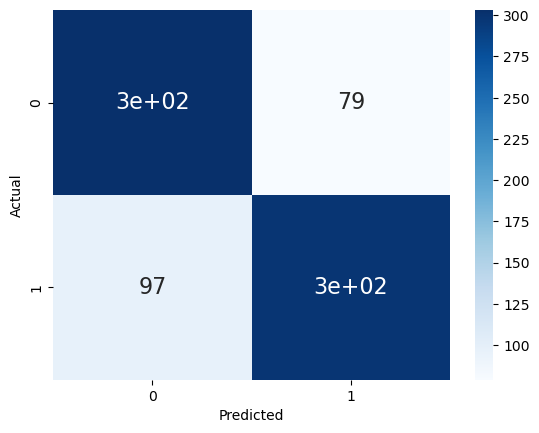

In [108]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Applying Hyperparameter tuning with Linear Discriminant Analysis (LDA)

In [109]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# List of test split ratios
test_split_percentages = [0.30]

for test_size in test_split_percentages:
    # Split the data into training and validation sets
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    
    # Create a Linear Discriminant Analysis model
    lda = LinearDiscriminantAnalysis()
    
    # Set up parameter grid for LDA
    parameter_grid = {
        'solver': ['svd', 'lsqr', 'eigen'],  # Different solver options
        'shrinkage': [None, 'auto']          # Whether or not to apply shrinkage
    }
    
    # Set up Grid Search
    grid = GridSearchCV(lda, parameter_grid, cv=5, scoring='accuracy')
    
    # Fit the grid search
    grid.fit(X_train, y_train)
    
    # Get the best model
    model = grid.best_estimator_
    
    # Evaluate the Model
    y_predict = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(model)
    
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")

Best Model for 30% Test Split:
LinearDiscriminantAnalysis()
Accuracy for 30% Test Split: 0.7734877734877735




In [110]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.7734877734877735
[[303  79]
 [ 97 298]]
              precision    recall  f1-score   support

           0       0.76      0.79      0.77       382
           1       0.79      0.75      0.77       395

    accuracy                           0.77       777
   macro avg       0.77      0.77      0.77       777
weighted avg       0.77      0.77      0.77       777



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

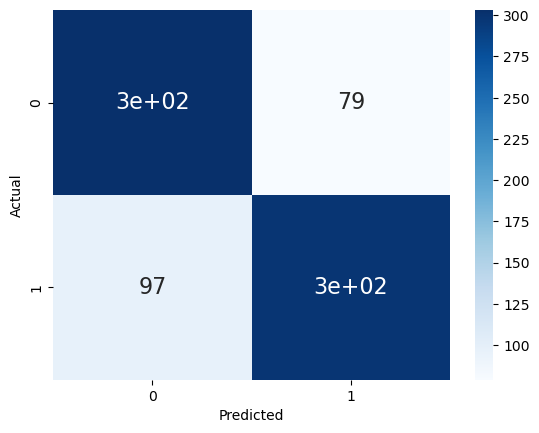

In [111]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})

## Applying Hyperparameter tuning with KNeighbors Classifier (KNN)

In [112]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# List of test split ratios
test_split_percentages = [0.30]

for test_size in test_split_percentages:
    # Split the data into training and validation sets
    X_train, X_validation, y_train, y_validation = train_test_split(X_train_new, y_train_new, test_size=test_size, random_state=1)
    
    # Create a KNeighborsClassifier model
    knn = KNeighborsClassifier()
    
    # Set up parameter grid for KNeighborsClassifier
    parameter_grid = {
        'n_neighbors': [3, 5, 7],  # Number of neighbors
        'weights': ['uniform', 'distance'],  # Weighting of neighbors
        'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute']  # Algorithm for nearest neighbors
    }
    
    # Set up Grid Search
    grid = GridSearchCV(knn, parameter_grid, cv=5, scoring='accuracy')
    
    # Fit the grid search
    grid.fit(X_train, y_train)
    
    # Get the best model
    model = grid.best_estimator_
    
    # Evaluate the Model
    y_predict = model.predict(X_validation)
    accuracy = accuracy_score(y_validation, y_predict)
    
    print(f"Best Model for {int(test_size * 100)}% Test Split:")
    print(model)
    
    print(f"Accuracy for {int(test_size * 100)}% Test Split: {accuracy}")
    print("\n")


Best Model for 30% Test Split:
KNeighborsClassifier(weights='distance')
Accuracy for 30% Test Split: 0.6975546975546976




In [113]:
# Showing the classification matrix with recall as a score metric
rescaledValidationX = X_validation
predictions = model.predict(rescaledValidationX)
print(accuracy_score(y_validation, predictions))
print(confusion_matrix(y_validation, predictions))
print(classification_report(y_validation, predictions))

0.6975546975546976
[[261 121]
 [114 281]]
              precision    recall  f1-score   support

           0       0.70      0.68      0.69       382
           1       0.70      0.71      0.71       395

    accuracy                           0.70       777
   macro avg       0.70      0.70      0.70       777
weighted avg       0.70      0.70      0.70       777



<AxesSubplot:xlabel='Predicted', ylabel='Actual'>

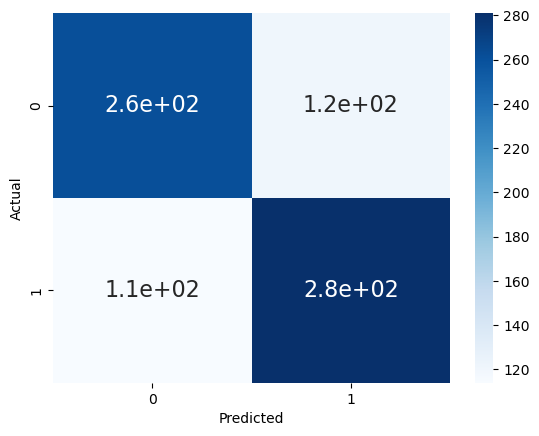

In [114]:
df_cm = pd.DataFrame(confusion_matrix(y_validation, predictions), 
                     columns=np.unique(y_validation), 
                     index = np.unique(y_validation))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
sns.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16})